# Import the Libraries

In [30]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Load Data From CSV File

In [31]:
old_df = pd.read_csv("Desktop\Cust_Segmentation.csv")

old_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


# Pre-processing - Delete the unneeded column

In [32]:
#Address in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.

df= old_df.drop("Address", axis =1)

#Show the dataset

df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


# Clean the Dataset

In [33]:
#It means X is a dataframe, including all the rows of df and all the columns of df but the first one, Customer Id

X = df.values[:,1:]

#Replace NaN with zero and infinity with large finite numbers

X = np.nan_to_num(X)

#Show the dataset

X

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

# Plot the data in 3D view

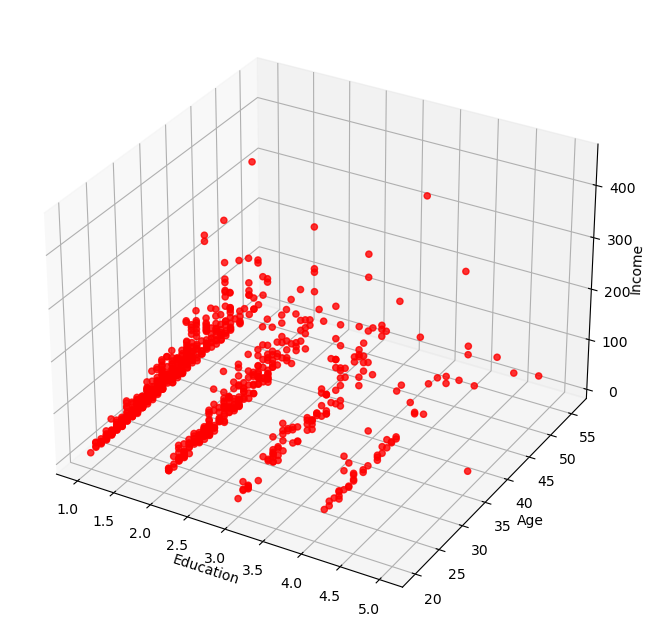

In [34]:
# Initialize the plot with the specified dimensions.

fig = plt.figure(figsize=(10,8))

# Create a 3D plot

ax = fig.add_subplot(1,1,1, projection='3d')

#scatter the x,y,z data with the color of c, and The alpha blending value, between 0 (transparent) and 1 (opaque).

ax.scatter(  X[:, 1], X[:, 0], X[:,3], c='red',alpha = 0.8)

#set the label for x-axis

ax.set_xlabel("Education",fontdict=None, labelpad=0)

#set the label for y-axis

ax.set_ylabel("Age",fontdict=None, labelpad=0)

#set the label for z-axis

ax.set_zlabel("Income",fontdict=None, labelpad=-1)

# Show the plot

plt.show()

# Normalizing over the standard deviation


In [35]:
#Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit_transform(X)

# Find the best and efficient cluster number with the help of SSE


In [36]:
k_rng = range(1,10)

SSE = []

for k in range(1,10):

    KM = KMeans(n_clusters = k)
    
    KM.fit(X)
    
    SSE.append(KM.inertia_)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

# Display the k vs. SSE plot


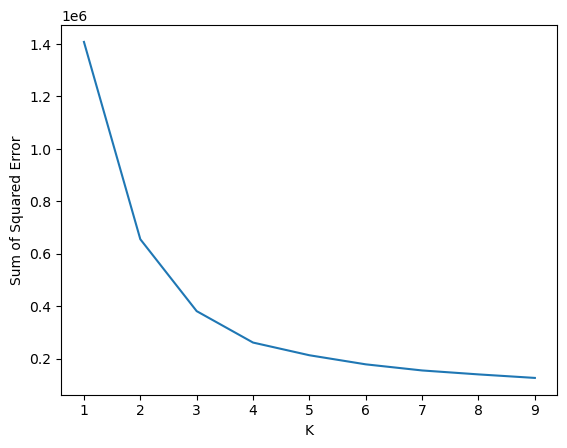

In [37]:
plt.xlabel('K')

plt.ylabel('Sum of Squared Error')

plt.plot(k_rng,SSE)

#as the elbow method we have figured out the k value = 4 is efficient and best k value, we can use this number of clusters in the K-Means setting up.

# Set up K-Means


In [38]:
#init : Initialization method of the centroids

#n_clusters : The number of clusters to form as well as the number of centroids to generate.

#n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

kmean = KMeans(init = 'k-means++',n_clusters = 4, n_init = 12)

#Fit the KMeans model with the feature matrix scaler 

kmean.fit(scaler)

#as a result of kmean.fit(scaler), we have kmean.labels_, which are the labels for each point in the model using KMeans


label = kmean.labels_ 

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


# Add label columns in the DataFrame with the name of clus_km, and group the dataframe by clus_km and show the means of the data.

In [39]:
df["clus_km"] = label

df.groupby("clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clus_km,,,,,,,,,
0,424.442424,31.812121,1.878788,3.933333,31.442424,1.597758,2.793218,0.987805,14.041818
1,402.705882,41.619910,1.601810,15.904977,71.923077,1.946240,4.266186,0.011696,9.828507
2,435.479905,32.078014,1.645390,5.730496,30.851064,0.741374,1.612076,0.000000,7.933570
3,449.658537,42.902439,2.292683,16.902439,135.146341,8.120659,12.959537,0.593750,19.536585


In [40]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,3
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8,2
846,847,28,2,7,34,0.359,2.021,0.0,7.0,2
847,848,25,4,0,18,2.802,3.210,1.0,33.4,0
848,849,32,1,12,28,0.116,0.696,0.0,2.9,2


# Display result 3D plot based on Education, Age, Income data

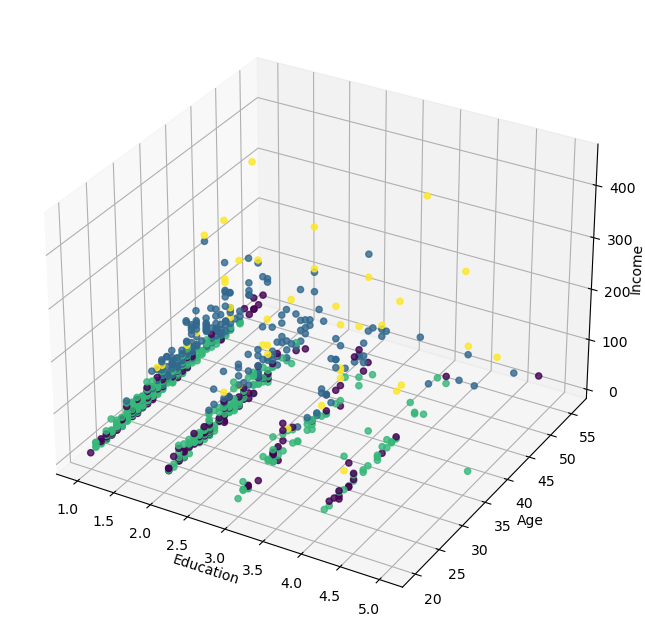

In [41]:
# Initialize the plot with the specified dimensions.

fig = plt.figure(figsize=(10,8))

#Creat a 3D Plot

ax = fig.add_subplot(1,1,1, projection='3d')

#scatter the x(Education),y(Age),z(Income) data with the color of c, which is different and depend on the label of each data, and The alpha blending value, between 0 (transparent) and 1 (opaque).

ax.scatter(  X[:, 1], X[:, 0], X[:,3], c=label.astype(float),alpha = 0.8)

#set the label for x-axis

ax.set_xlabel("Education",fontdict=None, labelpad=0)

#set the label for y-axis

ax.set_ylabel("Age",fontdict=None, labelpad=0)

#set the label for z-axis

ax.set_zlabel("Income",fontdict=None, labelpad=-1)

# Show the plot

plt.show()


# Display result 2D plot based on Age and Income

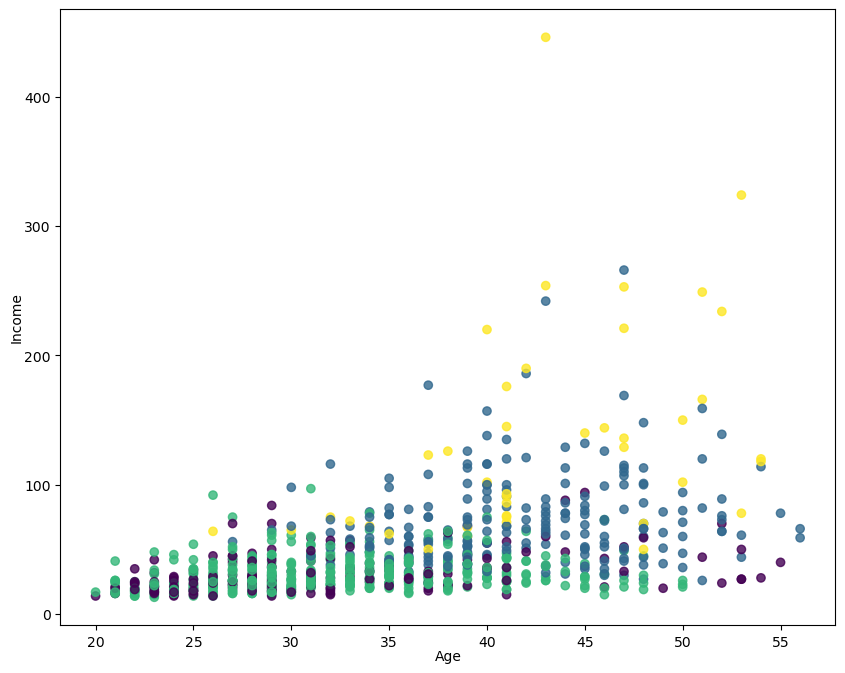

In [42]:
# Initialize the plot with the specified dimensions.

fig = plt.figure(figsize=(10,8))

#Creat a Plot

ax = fig.add_subplot(111)

#scatter the x(Age),y(Income) data with the color of c, which is different and depend on the label of each data, and The alpha blending value, between 0 (transparent) and 1 (opaque).


ax.scatter(  X[:, 0], X[:, 3],  c=label.astype(float),alpha =0.8)

#set the label for x-axis

ax.set_xlabel("Age",fontdict=None, labelpad=0)

#set the label for y-axis

ax.set_ylabel("Income",fontdict=None, labelpad=0)

# Show the plot

plt.show()
